# Preventing Customer Churn

# Imports

In [5]:
#all imports for project 
from pathlib import Path 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import get_db_url
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# our own acquire script:
import acquire 

import prep

import warnings
warnings.filterwarnings("ignore")

#alpha will equal .05 for all statistical tests
a = .05

np.random.seed(100)

# Acquire

* I acquired this data from the Codeup database using mySQL workbench
* I acquired this data on Wednesday October 26th 
* The data has 7,043 rows and 24 columns 
* Each observation or row represents a business profile of a customer
* Each column represents a description of the customer or their service account

In [6]:
# running acquire file 
df = acquire.new_telco_data()


# Prepare

* Removed null values stored as whitespace
* Changed total charges from object to float and did not identify or address outliers
* Encoded binary categorical variables to 1 or 0 
* Converted non-binary categorical variables to 1 and 0 
* No columns were dropped during preparation 
* Split data into train, validate and test(approx. 74/16/10)


In [7]:
# Import your prepare function and use it to clean your data here/split data 
train, validate, test = prep.prep_telco_data(df)

## Data at a glance 

In [9]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5783,1,1,3,8144-DGHXP,Female,0,No,No,54,Yes,...,1,0,1,0,1,0,0,0,1,0
6596,1,1,1,9373-WSLOY,Male,1,Yes,No,33,No,...,1,0,0,0,0,0,0,0,1,0
5340,3,2,2,7544-ZVIKX,Male,0,Yes,Yes,58,Yes,...,1,0,1,1,0,1,0,0,0,0
5311,4,2,1,7503-QQRVF,Male,1,Yes,No,16,Yes,...,0,0,0,0,0,1,0,1,0,0
3328,1,2,1,4741-WWJQZ,Female,0,Yes,No,2,Yes,...,0,0,0,0,0,1,0,0,1,0


## Description of the data 

In [10]:
train.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,...,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,2.324863,1.869903,1.690499,0.160250,32.558695,64.877954,2302.404295,0.491940,0.485682,0.296795,...,0.389342,0.215816,0.395600,0.213351,0.238574,0.438270,0.215816,0.220178,0.332069,0.231178
std,1.150684,0.738179,0.831257,0.366873,24.562214,30.123931,2274.643836,0.499982,0.499842,0.456889,...,0.487647,0.411427,0.489026,0.409712,0.426252,0.496222,0.411427,0.414406,0.471000,0.421626
min,1.000000,1.000000,1.000000,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.550000,401.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000,1406.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,2.000000,0.000000,56.000000,89.900000,3862.550000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploration of Data

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

## How often do customers churn?

[Text(0.5, 1.0, 'Churned Customers')]

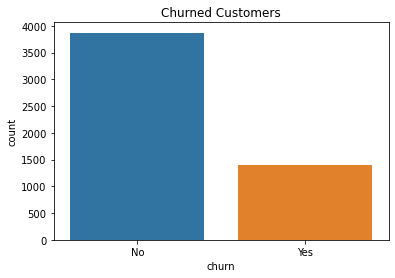

In [33]:
#code for bar charts
# hide this chart 
df = train
sns.countplot(x=df["churn"]).set(title='Churned Customers')

* 

In [12]:
train.churn.value_counts()

No     3871
Yes    1402
Name: churn, dtype: int64

* This data shows that about 26% of customers churn

## Is there an association between churn and having phone service? 

[Text(0.5, 1.0, 'Churn And Phone Service')]

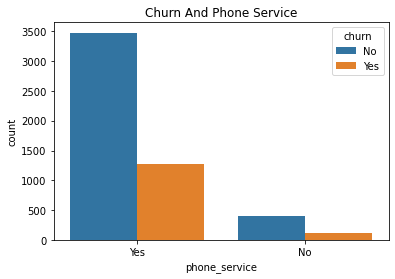

In [35]:
# codeup for bar plots
#hide this code with function 
sns.countplot(data=train, x="phone_service", hue="churn").set(title='Churn And Phone Service')

These are two categorical variables so I will use a chi^2 test to determine if there is an association between the two variables. 

In [15]:
# cross tab created in preparation to run chi^2 test
# hide this function
observed = pd.crosstab(train.churn, train.phone_service)
observed

phone_service,No,Yes
churn,,
No,395,3476
Yes,124,1278


In [16]:
#code to generate results of chi^2 test 
# hide this code 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

0.1579813801645912

In [17]:
#output of values observed and expected values from test
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[ 395 3476]
 [ 124 1278]]

Expected
[[ 381 3489]
 [ 137 1264]]

----
chi^2 = 1.9934
p     = 0.1579813801645912


* The results of the chi^2 test support the idea that there is not an association between churn and the phone service

## Is there an association between churn and having techinical support?

[Text(0.5, 1.0, 'Churn And Tech Support')]

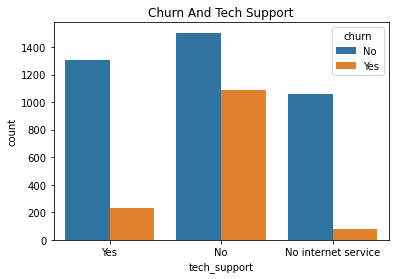

In [37]:
# code to display bar charts
# hide this code
sns.countplot(data=train, x="tech_support", hue="churn").set(title='Churn And Tech Support')

In [21]:
# cross tab created in preparation to run chi^2 test
# hide code
observed = pd.crosstab(train.churn, train.tech_support)
observed

tech_support,No,No internet service,Yes
churn,,,
No,1504,1057,1310
Yes,1092,81,229


In [22]:
#code to generate results of chi^2 test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

2.2865581269117635e-141

In [23]:
#output of values observed and expected values from test
# hide code 
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[1504 1057 1310]
 [1092   81  229]]

Expected
[[1905  835 1129]
 [ 690  302  409]]

----
chi^2 = 647.6749
p     = 2.2865581269117635e-141


*  The results of the chi^2 test support the hypothesis that there is an association between churn and a customer having technical support

## Is there an association between churn and having fiber optic internet?

[Text(0.5, 1.0, 'Churn And Internet Type')]

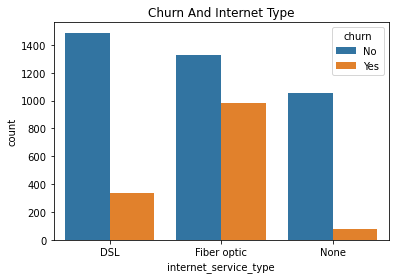

In [40]:
#code for bar charts
# hide code
sns.countplot(data=train, x="internet_service_type", hue="churn").set(title='Churn And Internet Type')

In [25]:
# cross tab created in preparation to run chi^2 test
# hide code
observed = pd.crosstab(train['churn'], train['internet_service_type_Fiber optic'])
observed

internet_service_type_Fiber optic,0,1
churn,,
No,2544,1327
Yes,418,984


In [26]:
#code to generate results of chi^2 test 
# hide code
# don't include in presentation 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

6.608799714670794e-119

In [27]:
#output of values observed and expected values from test
# don't have to include in presentation
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[2544 1327]
 [ 418  984]]

Expected
[[2174 1696]
 [ 787  614]]

----
chi^2 = 537.4962
p     = 6.608799714670794e-119


*  The results of the chi^2 test support the idea that there is an association between churn and a customer having fiber optic internet service.

## Is there an association between churn and contract type?

[Text(0.5, 1.0, 'Churn And Contract Type')]

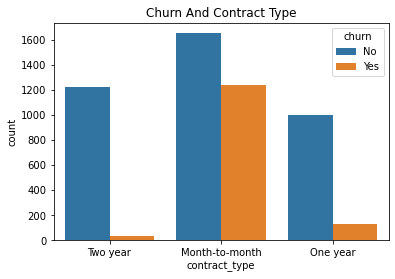

In [42]:
# bar chart 
# hide code
sns.countplot(data=train, x="contract_type", hue="churn").set(title='Churn And Contract Type')

In [29]:
# cross tab created in preparation to run chi^2 test
observed = pd.crosstab(train.churn, train.contract_type_id)
observed

contract_type_id,1,2,3
churn,,,
No,1652,998,1221
Yes,1238,127,37


In [30]:
#code to generate results of chi^2 test
# hide code
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

3.595868861996222e-193

In [31]:
#output of values observed and expected values from test
# hide code 
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[1652  998 1221]
 [1238  127   37]]

Expected
[[2121  825  923]
 [ 768  299  334]]

----
chi^2 = 886.2383
p     = 3.595868861996222e-193


**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

## You may use this as a template for how to ask and answer each question:

### 1) Question about the data
* Ask a question about the data for which you got a meaningful result
* There is no connection can be a meaningful result

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* Be sure that you are not violating any of the assumptions for the statistical test you are choosing
* Your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [3]:
# If you use code to generate your baseline run the code and generate the output here

Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [4]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [5]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.